# Lab 20 - Hierarchical Clustering

We will look at two datasets today as we study hierarchical clustering.  

## Clustering the Iris data

The first is the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which contains 50 samples each of 3 types of irises (Iris setosa, Iris virginica and Iris versicolor).  The 4 measurements for each iris are the length and width (in cm) of the [sepals](https://en.wikipedia.org/wiki/Sepal) and petals.

The iris dataset is included in the sci-kit learn package, so we can load it from there.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import confusion_matrix

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

As with the Boston housing dataset, we can load the iris dataset from sci-kit learn.  The iris dataset is also in dictionary format.

In [2]:
iris_dict = datasets.load_iris()
iris_dict

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Type `iris_dict.keys()` to see what is included in the dataset.

In [3]:
iris_dict.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Create a dataframe from the dictionary:

In [6]:
iris = pd.DataFrame(iris_dict.data, columns = iris_dict.feature_names)


Display your new dataset.

In [5]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Since we will compare the rows using the Euclidean distance, we should scale all columns to be between 0 and 1.  Do this below, storing the scaled data in the variable `iris_scaled` (see Lab 19).

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
iris_scaled = scaler.fit_transform(iris)

Next we will plot a dendrogram (tree) of the distances between the irises.

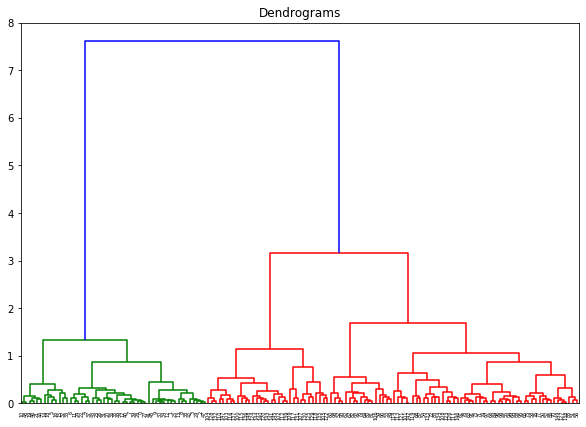

In [20]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(iris_scaled, method='ward'))

We can only plot the tree with the scipy package, so we need to use its linkage (clustering) function to produce the tree in a compatible format.

However, it is easier to use the sklearn package implementation for all other analysis.

In [21]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(iris_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

Add the clusters to the `iris` dataframe as a new column.

In [22]:
iris["clusters"] = clusters

To see how our clustering did, let's create a scatter plot of two of the columns in iris (your choice of columns), colored by the cluster.

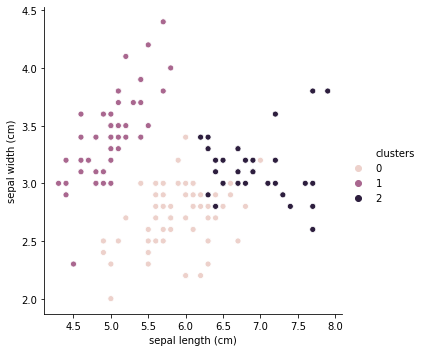

In [23]:
sns.relplot(x = "sepal length (cm)", y = "sepal width (cm)", hue = "clusters", data = iris)

How well do you think the clustering algorithm worked from this graph?

__I think the clustering algorithm worked well.__

Let's compare it with the same plot, colored by the true type of iris.

First, add a new column to the `iris` dataframe with the `target` data in the dictionary.

In [26]:
iris["target"] = iris_dict.target

Next, plot the same two variables as above, colored by the true type of iris.

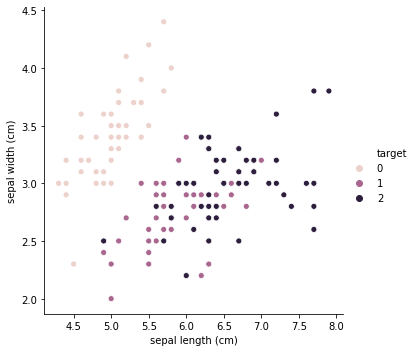

In [27]:
sns.relplot(x = "sepal length (cm)", y = "sepal width (cm)", hue = "target", data = iris)

How do your two plots compare?  

__The two plots are very similar.__

We can also use a confusion matrix to compare the predicted clusters with the real ones.  Try it below.

In [30]:
confusion_matrix(iris["target"], iris["clusters"])

array([[ 0, 50,  0],
       [50,  0,  0],
       [17,  0, 33]], dtype=int64)

What is the accuracy of this clustering method?

What happens if you try Ward linkage instead?

### Clustering labor market data

The Federal Reserve Bank of New York has information about the labor market for recent college graduates [here](https://www.newyorkfed.org/research/college-labor-market/college-labor-market_compare-majors.html).

The data in this table can be downloaded as an Excel file at the bottom of the page. If you open this file in Excel, you can save the last table as a CSV file. Alternatively, download the data as a CSV file from the course website.

Open the CSV file in Jupyter or another text editor to see if there are extra lines that need to be accounted for when reading it in.  Recall that `read_csv()` has the optional parameters `skiprows` and `skipfooter` (ignore the warnings this parameter generates).

Additionally, set the index to be the `Major` column.

In [35]:
labor = pd.read_csv("labor_market.csv", index_col = "Major")
labor.head()

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
Major,,,,,
Agriculture,3.1,53.9,"40,000","60,000",20.8
Animal and Plant Sciences,3.0,57.4,"35,000","60,000",34.8
Environmental Studies,4.6,49.3,"36,000","65,000",32.2
Architecture,4.3,26.6,"45,000","75,000",37.4
Ethnic Studies,5.7,50.1,"38,000","57,000",49.4


Recall we can look at the types of the columns using the pattern `df.dtypes`.  

In [36]:
labor.dtypes

Unemployment Rate             float64
Underemployment Rate          float64
Median Wage Early Career       object
Median Wage Mid-Career         object
Share with Graduate Degree    float64
dtype: object

Which two columns are not numerical types (integers or floats)?  Can you guess why?

The following code removes the commas and converts the type to float.

In [37]:
labor["Median Wage Early Career"] = labor["Median Wage Early Career"].str.replace(",","").astype(float)
labor["Median Wage Mid-Career"] = labor["Median Wage Mid-Career"].str.replace(",","").astype(float)

Check that the columns all have a numerical type.

In [38]:
labor.dtypes

Unemployment Rate             float64
Underemployment Rate          float64
Median Wage Early Career      float64
Median Wage Mid-Career        float64
Share with Graduate Degree    float64
dtype: object

Scale the data in each column to be between 0 and 1.

In [39]:
labor_scaled = scaler.fit_transform(labor)

We can put the scaled data back into a dataframe:

In [40]:
labor_scaled = pd.DataFrame(labor_scaled, columns = labor.columns, index = labor.index)
labor_scaled

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
Major,,,,,
Agriculture,0.308824,0.687702,0.263158,0.256757,0.172185
Animal and Plant Sciences,0.294118,0.744337,0.131579,0.256757,0.403974
Environmental Studies,0.529412,0.613269,0.157895,0.324324,0.360927
Architecture,0.485294,0.245955,0.394737,0.459459,0.447020
Ethnic Studies,0.691176,0.626214,0.210526,0.216216,0.645695
Communications,0.426471,0.673139,0.263158,0.391892,0.213576
Journalism,0.397059,0.503236,0.210526,0.324324,0.246689
Mass Media,1.000000,0.708738,0.131579,0.256757,0.130795
Advertising and Public Relations,0.397059,0.587379,0.263158,0.418919,0.130795


Plot the dendrogram using Ward linkage.  To label the leaves as the majors, add the parameter `labels = labor_scaled.index` to the `dendrogram()` function.  

You might also want to increase the leaf font size using the optional parameter `leaf_font_size`.

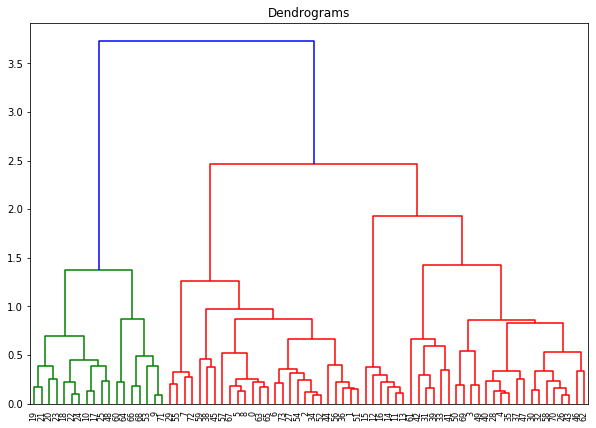

In [44]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(labor_scaled, method='ward'), leaf_font_size = 8)

What do you notice about the tree?  Do the relationships of the leaves make sense?

__I notice that the tree is concentrated in mostly 3-4 clusters. This makes sense because similar careers may have similar earning potentials.__

Let's compute the cluster using sklearn.

In [45]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(labor_scaled)
clusters

array([2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2,
       1, 2, 1, 0, 0, 1, 2, 2], dtype=int64)

Add the predicted clusters as a column to the `labor` dataframe.

In [47]:
labor["clusters"] = clusters
labor["clusters"].head()

Major
Agriculture                  2
Animal and Plant Sciences    2
Environmental Studies        2
Architecture                 0
Ethnic Studies               0
Name: clusters, dtype: int64

Check the clusters by using a filter to display only the rows in that cluster.  

In [48]:
zero_filter = labor["clusters"] == 0
one_filter = labor["clusters"] == 1
two_filter = labor["clusters"] == 2

In [60]:
labor[zero_filter].sample(10)

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters
Major,,,,,,
Miscellaneous Biological Sciences,3.9,46.5,35000.0,60000.0,60.4,0
Psychology,4.1,49.7,34000.0,56000.0,50.3,0
General Education,1.7,22.2,36000.0,45000.0,47.4,0
Philosophy,6.2,50.9,36000.0,62000.0,57.3,0
Foreign Language,4.2,46.2,35000.0,60000.0,50.0,0
Anthropology,6.6,59.1,33000.0,57000.0,46.9,0
Physics,5.3,31.7,48500.0,94000.0,68.9,0
Biology,4.6,44.6,35000.0,65000.0,63.2,0
Early Childhood Education,1.7,19.2,32100.0,41000.0,38.2,0


In [57]:
labor[one_filter].sample(10)

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters
Major,,,,,,
Chemical Engineering,2.6,21.6,68000.0,103000.0,48.8,1
Mechanical Engineering,4.3,21.0,63000.0,98000.0,41.0,1
Aerospace Engineering,4.1,26.8,64000.0,100000.0,52.9,1
Construction Services,6.1,34.0,56000.0,85000.0,10.4,1
Industrial Engineering,3.4,17.3,64000.0,87000.0,39.7,1
Miscellaneous Engineering,4.3,29.4,60000.0,85000.0,44.1,1
Finance,3.5,37.0,52000.0,85000.0,30.5,1
Nursing,2.0,11.4,50000.0,70000.0,26.4,1
Computer Engineering,2.5,20.1,65000.0,106000.0,39.9,1


In [58]:
labor[two_filter].sample(10)

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,clusters
Major,,,,,,
Medical Technicians,1.0,50.9,42600.0,64000.0,24.3,2
Agriculture,3.1,53.9,40000.0,60000.0,20.8,2
General Social Sciences,4.6,52.3,36000.0,60000.0,37.9,2
Miscellaneous Technologies,6.4,58.0,37000.0,72000.0,16.8,2
Environmental Studies,4.6,49.3,36000.0,65000.0,32.2,2
Art History,3.8,56.5,38900.0,60000.0,41.2,2
Marketing,3.0,52.7,42000.0,74000.0,16.9,2
Leisure and Hospitality,3.7,63.0,34200.0,58000.0,30.2,2
Public Policy and Law,1.7,62.8,40000.0,60000.0,44.8,2
